
## PODER ENCUESTAS COL2018 


**Encuestas a la fecha: 30**

Objetivo: Un intento de estimar el poder estadístico de las encuestas de intención de voto en R.

Índice:

1. Paquetes.
2. Alistamiento.
3. Cálculos de poder.
4. Gráficas.

In [1]:
# Paquetes

rm(list = ls())      #Limpiar ambiente en R
library(devtools)    #Instalar paquete de desarrollo antes de comenzar
# install_github("espanta/lubripack")     #Instalar lubripack para instalar y cargar varios paquetes a la vez
lubripack::lubripack("pwr","clusterPower","sampling","tidyverse","RCurl")    #paquetes

# Alistar
options(encoding = "UTF-8")

# Cargar encuesta
encuestas <- read.csv(
    text=getURL("https://raw.githubusercontent.com/nelsonamayad/Elecciones-presidenciales-2018/master/Elecciones%202018/encuestas2018.csv"), 
    header=T)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘RCurl’

The following object is masked from ‘package:tidyr’:

    complete




Bellow Packages Successfully Installed:

         pwr clusterPower     sampling    tidyverse        RCurl 
        TRUE         TRUE         TRUE         TRUE         TRUE 


### PODER
Ya que algunas fichas técnicas de las encuestas reportan márgenes de error para cierto tipo de pruebas (e.g. "el margen de error para una confianza del $\text{Y}\,\%$ es  $\text{X}\,\%$ para proporciones mayores a  $\text{Z}\,\%$), se interpretan esos márgenes para calcular el poder post hoc de cada encuesta utilizando la muestra efectiva, el tipo de prueba (i.e. diferencias en proporciones), el nivel de significancia (casi siempre $95\,\%$) y dejando que varíe el tamaño del efecto (de $1\,\%$ a $5\,\%$ de diferencia).

### Limitaciones:

1. No se incluyen clusters, así que la correlación intra-cluster se asume cero y eso infla el poder. Desafortunadamente, no es posible reconstruir la varianza dentro de la estratificación de las muestras que hacen las encuestas.
2. Para las encuestas que no mencionan el tipo de prueba se asume una prueba de diferencia de proporciones mayor a $50\,\%$ (la que abajo se denomina "Default").
3. Se utilizan los programas del paquete `pwr` en R.

### Supuestos:

Cálculos de poder para proporciones $p$ son un test de una cola (i.e. mayor un alpha) de la siguiente forma:

+ $H_0: p = X$.
+ $H_1: p > X + e$, donde $e$ la proporción especificada en la ficha técnica de la encuesta.

`pwr.p.test` se define así: `h(H1, H0)`, `n` (muestra), `sig.level` (alpha), y la opción de una sola cola.

In [2]:
cons.1 <- 0.5      #Encuestas #: 3-4, 6-9, 16. Default para encuestas #: 1, 10, 12, 14, 18, 21, 22, 24,25, 28, 29
cons.2 <- 0.2      #Encuestas #: 2, 5, 13, 17, 19, 23
cons.3 <- 0.25     #Encuestas #: 11
cons.4 <- 0.14     #Encuestas #: 15, 20
cons.5 <- 0.24     #Encuestas: 27
cons.6 <- 0.35     #Encuestas: 30
eff.1 <- 0.01      #Efecto a detectar 1%
eff.2 <- 0.02      #Efecto a detectar 2%
eff.5 <- 0.05      #Efecto a detectar 2%
a = 0.05 #Nivel de confianza 95%

In [3]:
# Efecto diminuto: 1% de diferencia

# Encuestas con proporción mayor a 50%:
pow.3 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[3])
pow.4 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[4])
pow.6 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[6])
pow.7 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[7])
pow.8 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[8])
pow.9 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[9])
pow.16 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[16])

# Encuestas con proporción mayor a 20%:
pow.2 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[2])
pow.5 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[5])
pow.13 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[13])
pow.17 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[17])
pow.19 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[19])
pow.23 <- pwr.p.test(h = ES.h(eff.1+cons.2, cons.2), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[23])

# Encuestas con proporción mayor a 25%:
pow.11 <- pwr.p.test(h = ES.h(eff.1+cons.3, cons.3), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[11])

# Encuestas con proporción mayor a 24%:
pow.27 <- pwr.p.test(h = ES.h(eff.1+cons.5, cons.5), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[27])

# Encuestas con proporción mayor a 14%:
pow.15 <- pwr.p.test(h = ES.h(eff.1+cons.4, cons.4), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[15])
pow.20 <- pwr.p.test(h = ES.h(eff.1+cons.4, cons.4), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[20])

# Encuestas con proporción mayor a 35%:
pow.30 <- pwr.p.test(h = ES.h(eff.1+cons.6, cons.6), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[30])

# Default para las que no especifican: proporción mayor a 50%:
pow.1 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[1])
pow.10 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[10])
pow.12 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[12])
pow.14 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[14])
pow.18 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[18])
pow.21 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[21])
pow.22 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[22])
pow.24 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[24])
pow.25 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[25])
pow.28 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[28])
pow.29 <- pwr.p.test(h = ES.h(eff.1+cons.1, cons.1), sig.level = a, alternative = "greater", n = encuestas$muestra_int_voto[29])

# Tribble con los resultados
d.eff.1 <- tribble(~n, ~power1, 
                   1, pow.1[[4]],
                   2, pow.2[[4]],
                   3, pow.3[[4]],
                   4, pow.4[[4]],
                   5, pow.5[[4]],
                   6, pow.6[[4]],
                   7, pow.7[[4]],
                   8, pow.8[[4]],
                   9, pow.9[[4]],
                   10, pow.2[[4]],
                   11, pow.11[[4]],
                   12, pow.2[[4]],
                   13, pow.13[[4]],
                   14, pow.13[[4]],
                   15, pow.15[[4]],
                   16, pow.16[[4]],
                   17, pow.17[[4]],
                   18, pow.13[[4]],
                   19, pow.19[[4]],
                   20, pow.20[[4]],
                   21, pow.13[[4]],
                   22, pow.13[[4]],
                   23, pow.23[[4]],
                   24, pow.24[[4]],
                   25, pow.25[[4]],
#                   26, pow.26[[4]]
                   27, pow.27[[4]],
                   28, pow.28[[4]],
                   29, pow.29[[4]],
                   30, pow.30[[4]]
)
## Se puede repetir con un loop para otros tamaños de efectos

### GRÁFICA

Warning message:
“Removed 1 rows containing missing values (geom_point).”

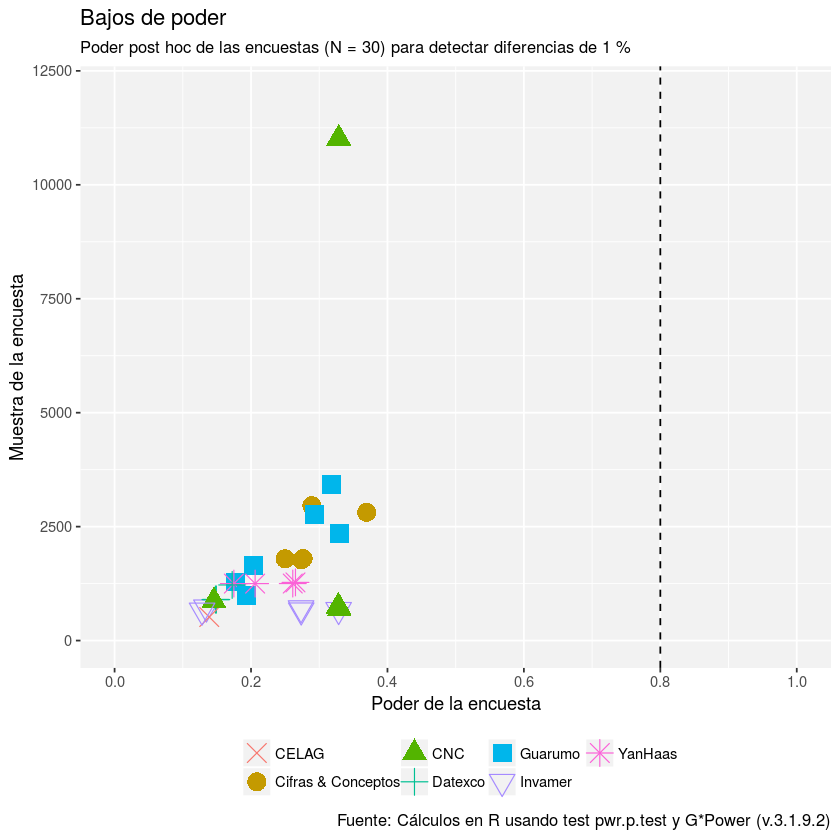

In [4]:
#Pegar calculos de poder a los datos de las encuestas
pow <- left_join(select(encuestas, n, fecha, encuestadora, muestra_int_voto), d.eff.1, by = "n")

# Poder para detectar una diferencia de 1%:
ggplot(data=filter(pow), aes(x=power1, y=muestra_int_voto)) + 
    geom_jitter(aes(color=encuestadora, shape=encuestadora), size=5) +                 #Datos 1% 
    geom_vline(xintercept=0.8, linetype="dashed") +                                     #linea de 80% de poder
    theme(legend.position="bottom", legend.title=element_blank(), panel.background=element_rect(fill="grey95")) +
    scale_y_continuous(limits=c(0,12000)) +
    scale_x_continuous(limits=c(0,1), breaks=c(0,0.2,0.4,0.6,0.8,1)) +
    labs(y="Muestra de la encuesta", 
         x="Poder de la encuesta",
         title="Bajos de poder",
         subtitle= 'Poder post hoc de las encuestas (N = 30) para detectar diferencias de 1 %',
         caption="Fuente: Cálculos en R usando test pwr.p.test y G*Power (v.3.1.9.2)"
         ) +
    scale_shape_manual(values=c(4,16,17,3,15,25,8))

### CONCLUSIÓN

Ninguna encuesta tienen poder suficiente para detectar diferencias de $1\,\%$ entre los candidatos. Eso es normal.

### EXTENSIÓN

Si repite el análisis con $2\,\%$ en vez de $1\,\%$, sólo Cifras & Conceptos y una encuesta telefonica del CNC tienen más de $80\,\%$ de poder para detectar ese efecto. Una de Guarumo está cerca con $\sim 77\,\%$.